In [154]:
import pyforest
import sys
sys.path.append('/Users/jayceepang/msse/ATOM_CODE/UTILS/')
from matplotlib.lines import Line2D

In [109]:
og_neks = ['NEK2_binding','NEK2_inhibition','NEK3_binding','NEK5_binding','NEK9_binding','NEK9_inhibition']
samplings =['none_scaled','UNDER','SMOTE','ADASYN'] 
new_neks=['NEK1', 'NEK11', 'NEK2', 'NEK3', 'NEK4', 'NEK5',
       'NEK6', 'NEK9']
og_datapath = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/datasets/80train_20test/featurized/'
results_dir='/Users/jayceepang/msse/ATOM_CODE/examples/holdout/holdout_results/'
gp_results_dir='/Users/jayceepang/msse/ATOM_CODE/examples/holdout/holdout_results/GP/'
datapath = '/Users/jayceepang/msse/ATOM_CODE/datasets/holdout_data/featurized/'
gp_path ='/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/GP_results/'
final_cols=['model','NEK','strategy','feat_type','RF_type', 'cm','recall', 'specificity', 'accuracy', 'precision', 
                'f1', 'ROC_AUC', 'MCC', 'balanced_accuracy']
feat_cols_dropped =['NEK','compound_id','base_rdkit_smiles', 'subset', 'active'] 

In [110]:
rf_results=pd.read_csv(f'{results_dir}RF/RF_nanobret_cellular_holdout_results.csv')
gp_results = pd.read_csv(f'{results_dir}GP/GP_nanobret_cellular_holdout_results.csv')
rf_results_cols = set(rf_results.columns)
gp_results_cols = set(gp_results.columns)
print(len(rf_results_cols), len(gp_results_cols))
print(rf_results_cols==gp_results_cols)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

18 18
True


In [111]:
all_results= pd.concat([rf_results, gp_results])
# all_results.to_csv('holdout/holdout_results/all_nanobret_cellular_holdout_results.csv',index=False)
og_neks = ['NEK2_binding', 'NEK2_inhibition', 'NEK3_binding', 'NEK5_binding','NEK9_binding', 'NEK9_inhibition'] 
best_rfs = [f'{og_nek}_MFP_none_scaled_BRFC' for og_nek in og_neks]
best_rfs.append('NEK9_inhibition_MFP_none_scaled_BRFC_BCW')
best_gps = [f'{og_nek}_UNDER_GP_matern' for og_nek in og_neks]
selected_prods = best_rfs+best_gps
selected_prods.remove('NEK9_inhibition_MFP_none_scaled_BRFC')

<IPython.core.display.Javascript object>

In [112]:
selected_results = all_results[all_results['prod_model'].isin(selected_prods)]

In [113]:
# selected_results.to_csv('holdout/holdout_results/nanobret_cellular_holdout_only_prod_models.csv',index=False)
print(selected_results['modeling_type'].unique())

['RF' 'GP']


In [150]:

selected_results['model'] = selected_results['model'].str.replace('none_scaled', 'Orig', regex=False)
selected_results['prod_model']=selected_results['prod_model'].str.replace('none_scaled', 'Orig')
selected_results['model strategy']=selected_results['model strategy'].str.replace('none_scaled', 'Orig')
# selected_results['model strategy'] =selected_results['model strategy'].replace({'NEK9_inhibition_MFP_Orig_BRFC_BCW',
#                                         'NEK9_inhibition_Orig Bstrp Under RF BalWeight',
#                                         'NEK2_binding_MFP_Orig_BRFC', 'NEK2_binding_Orig Bstrp Under RF'
#                                             'NEK3_binding_MFP_Orig_BRFC', 'NEK3_binding_Orig Bstrp Under RF',
#                                         'NEK5_binding_MFP_Orig_BRFC', 'NEK5_binding_Orig Bstrp Under RF',
#                                         'NEK9_binding_MFP_Orig_BRFC', 'NEK_binding_Orig Bstrp Under RF',
#                                         'NEK2_inhibition_MFP_Orig_BRFC', 'NEK3_inhibition_Orig Bstrp Under RF'
#                                             })

selected_results['prod_model'] = selected_results['prod_model'].replace({
    'NEK9_inhibition_MFP_Orig_BRFC_BCW': 'NEK9_inhibition_Orig Bstrp Under RF BalWeight',
    # 'NEK9_inhibition_Orig Bstrp Under RF BalWeight': 'NEK9 inhibition Orig Bootstrap Under RF BalWeight',
    'NEK2_binding_MFP_Orig_BRFC': 'NEK2_binding_Orig Bstrp Under RF',
    'NEK3_binding_MFP_Orig_BRFC': 'NEK3_binding_Orig Bstrp Under RF',
    'NEK3_binding_Orig Bstrp Under RF': 'NEK3 binding Orig Bootstrap Under RF',
    'NEK5_binding_MFP_Orig_BRFC': 'NEK5_binding_Orig Bstrp Under RF',
    'NEK9_binding_MFP_Orig_BRFC': 'NEK_binding_Orig Bstrp Under RF',
    'NEK2_inhibition_MFP_Orig_BRFC': 'NEK3_inhibition_Orig Bstrp Under RF'})
selected_results['model strategy_old'] = selected_results['model strategy']
selected_results['1-specificity'] = 1-selected_results['specificity']
selected_results['model strategy'] =selected_results['prod_model'].str.split('_').str[2:].str.join('_')
selected_results

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/2264887249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_results['model'] = selected_results['model'].str.replace('none_scaled', 'Orig', regex=False)
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/2264887249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_results['prod_model']=selected_results['prod_model'].str.replace('none_scaled', 'Orig')
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykerne

,model,data NEK,prod_model,model NEK,model version,model strategy,feat_type,cm,recall,specificity,accuracy,precision,f1,ROC_AUC,MCC,balanced_accuracy,set,modeling_type,model strategy_old,1-specificity
2,NEK1_NEK2_binding_MFP_Orig_BRFC,NEK1,NEK2_binding_Orig Bstrp Under RF,NEK2_binding,BRFC,Orig Bstrp Under RF,MFP,"[121, 249, 1, 29]",0.966667,0.327027,0.3750,0.104317,0.188312,0.646847,0.168017,0.646847,nanobret_cellular_holdout,RF,Orig Bstrp Under RF,0.672973
18,NEK1_NEK2_inhibition_MFP_Orig_BRFC,NEK1,NEK3_inhibition_Orig Bstrp Under RF,NEK2_inhibition,BRFC,Orig Bstrp Under RF,MFP,"[113, 257, 1, 29]",0.966667,0.305405,0.3550,0.101399,0.183544,0.636036,0.158749,0.636036,nanobret_cellular_holdout,RF,Orig Bstrp Under RF,0.694595
34,NEK1_NEK3_binding_MFP_Orig_BRFC,NEK1,NEK3 binding Orig Bootstrap Under RF,NEK3_binding,BRFC,,MFP,"[167, 203, 2, 28]",0.933333,0.451351,0.4875,0.121212,0.214559,0.692342,0.205124,0.692342,nanobret_cellular_holdout,RF,,0.548649
50,NEK1_NEK5_binding_MFP_Orig_BRFC,NEK1,NEK5_binding_Orig Bstrp Under RF,NEK5_binding,BRFC,Orig Bstrp Under RF,MFP,"[182, 188, 8, 22]",0.733333,0.491892,0.5100,0.104762,0.183333,0.612613,0.118793,0.612613,nanobret_cellular_holdout,RF,Orig Bstrp Under RF,0.508108
66,NEK1_NEK9_binding_MFP_Orig_BRFC,NEK1,NEK_binding_Orig Bstrp Under RF,NEK9_binding,BRFC,Orig Bstrp Under RF,MFP,"[152, 218, 0, 30]",1.000000,0.410811,0.4550,0.120968,0.215827,0.705405,0.222923,0.705405,nanobret_cellular_holdout,RF,Orig Bstrp Under RF,0.589189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,NEK6_MFP_Orig_NEK2_binding_UNDER_GP_matern,NEK6,NEK2_binding_UNDER_GP_matern,NEK2_binding,GP_matern,UNDER_GP_matern,MFP,"[156, 244, 0, 0]",0.000000,0.390000,0.3900,0.000000,0.000000,NaN,0.000000,0.390000,nanobret_cellular_holdout,GP,UNDER_GP_matern,0.610000
188,NEK4_MFP_Orig_NEK9_binding_UNDER_GP_matern,NEK4,NEK9_binding_UNDER_GP_matern,NEK9_binding,GP_matern,UNDER_GP_matern,MFP,"[150, 250, 0, 0]",0.000000,0.375000,0.3750,0.000000,0.000000,NaN,0.000000,0.375000,nanobret_cellular_holdout,GP,UNDER_GP_matern,0.625000
189,NEK6_MFP_Orig_NEK9_binding_UNDER_GP_matern,NEK6,NEK9_binding_UNDER_GP_matern,NEK9_binding,GP_matern,UNDER_GP_matern,MFP,"[150, 250, 0, 0]",0.000000,0.375000,0.3750,0.000000,0.000000,NaN,0.000000,0.375000,nanobret_cellular_holdout,GP,UNDER_GP_matern,0.625000
190,NEK4_MFP_Orig_NEK2_inhibition_UNDER_GP_matern,NEK4,NEK2_inhibition_UNDER_GP_matern,NEK2_inhibition,GP_matern,UNDER_GP_matern,MFP,"[141, 259, 0, 0]",0.000000,0.352500,0.3525,0.000000,0.000000,NaN,0.000000,0.352500,nanobret_cellular_holdout,GP,UNDER_GP_matern,0.647500


In [164]:
# produ results
orig_results = pd.read_csv('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/prod_best_GP_best_RF.csv')
orig_results['model'] = orig_results['model'].replace('MFP_UNDER_matern', 'UNDER_GP_matern')

orig_results['model'] = orig_results['NEK'].astype(str)+'_'+orig_results['strategy'] 
orig_results=orig_results.rename(columns={'model': 'prod_model', 'NEK': 'data NEK'
                                         ,'model version':'model strategy_old'})

holdout_df_cols = ['model', 'data NEK', 'prod_model', 'model NEK', 'model version',
       'model strategy', 'feat_type', 'cm', 'recall', 'specificity',
       'accuracy', 'precision', 'f1', 'ROC_AUC', 'MCC', 'balanced_accuracy',
       'set', 'modeling_type', 'model strategy_old', '1-specificity']

orig_cols =['prod_model', 'data NEK', 'strategy', 'feat_type', 'cm', 'recall',
       'specificity', 'accuracy', 'precision', 'f1', 'ROC_AUC', 'MCC',
       'balanced_accuracy', 'modeling_type', 'set', '1-specificity',
       'nek type', 'model version', 'RF_type', 'model name', 'active ratio',
       'model', 'model NEK'] 
orig_results['model NEK'] = orig_results['data NEK'] 
extra_cols_to_drop = ['active ratio', 'RF_type', 'model name', 'nek type']
orig_results = orig_results.drop(columns=extra_cols_to_drop)
rf_prod_results = orig_results[(orig_results['strategy']=='Orig Bstrp Under RF')|
                            (orig_results['strategy']=='Orig Bstrp Under RF BalWeight')]


gp_prod_results = orig_results[orig_results['strategy']=='UNDER_GP_matern']
rf_prod_results
print(orig_results.columns)

<IPython.core.display.Javascript object>

Index(['prod_model', 'data NEK', 'strategy', 'feat_type', 'cm', 'recall',
       'specificity', 'accuracy', 'precision', 'f1', 'ROC_AUC', 'MCC',
       'balanced_accuracy', 'modeling_type', 'set', '1-specificity',
       'model strategy_old', 'model NEK'],
      dtype='object')


NEK2_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/953009924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/953009924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/953009924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/953009924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/953009924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/953009924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

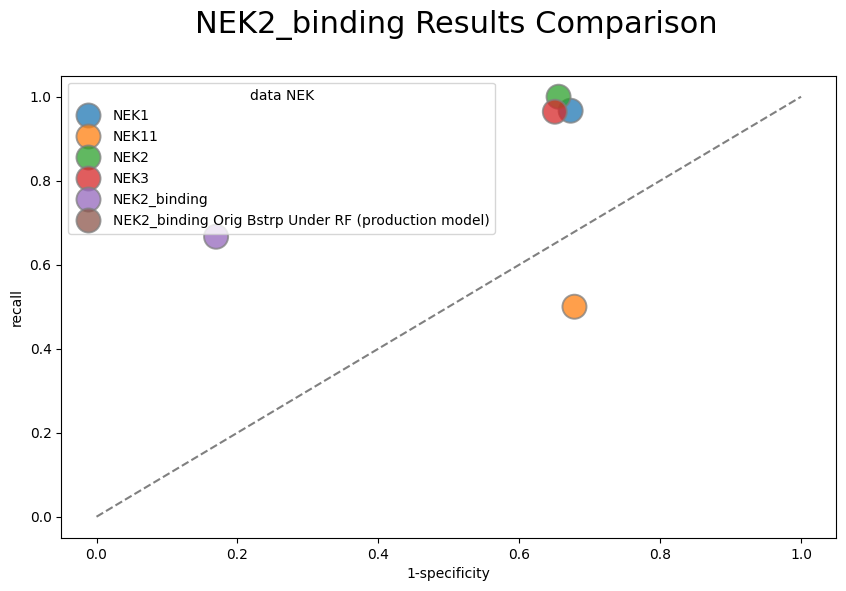

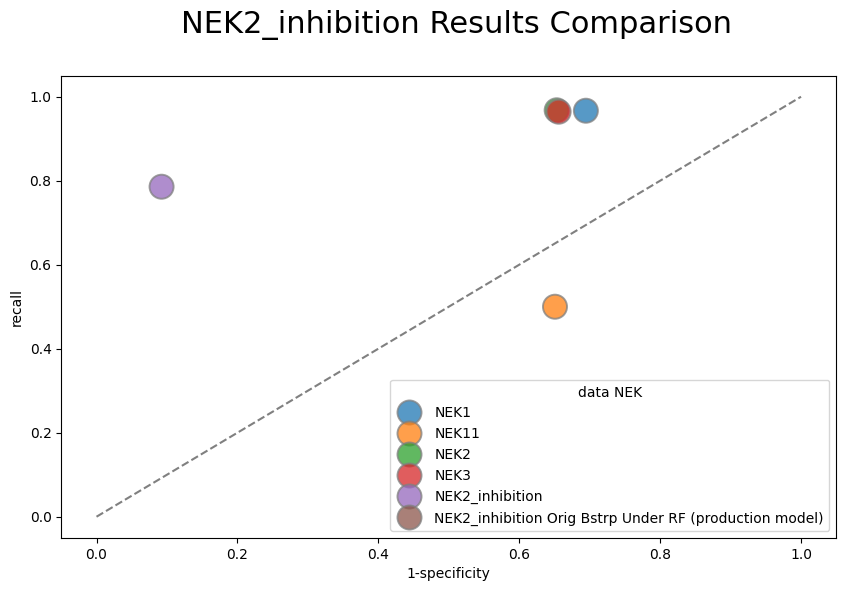

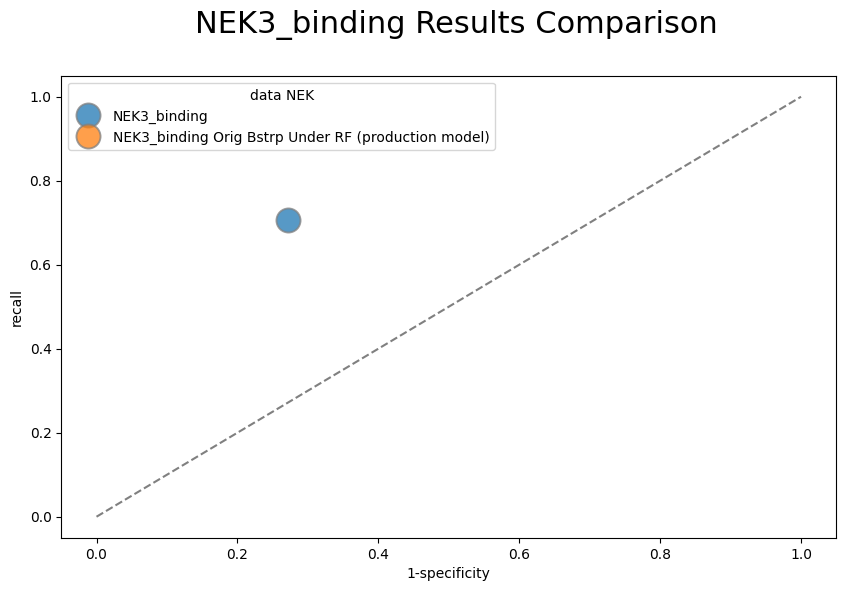

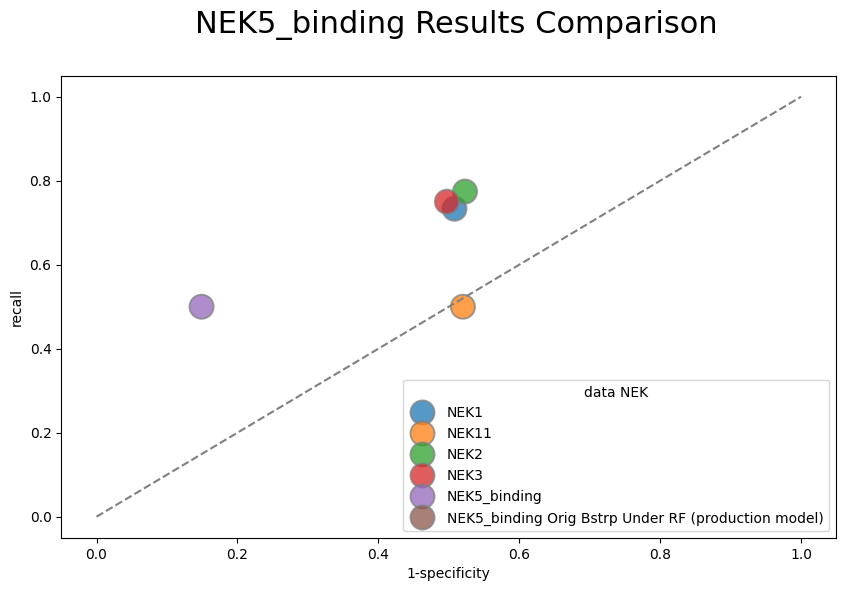

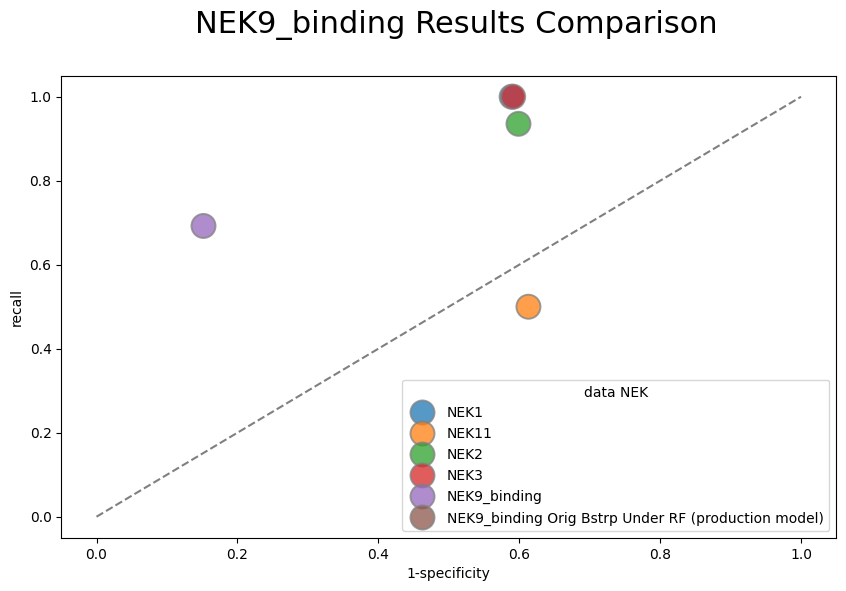

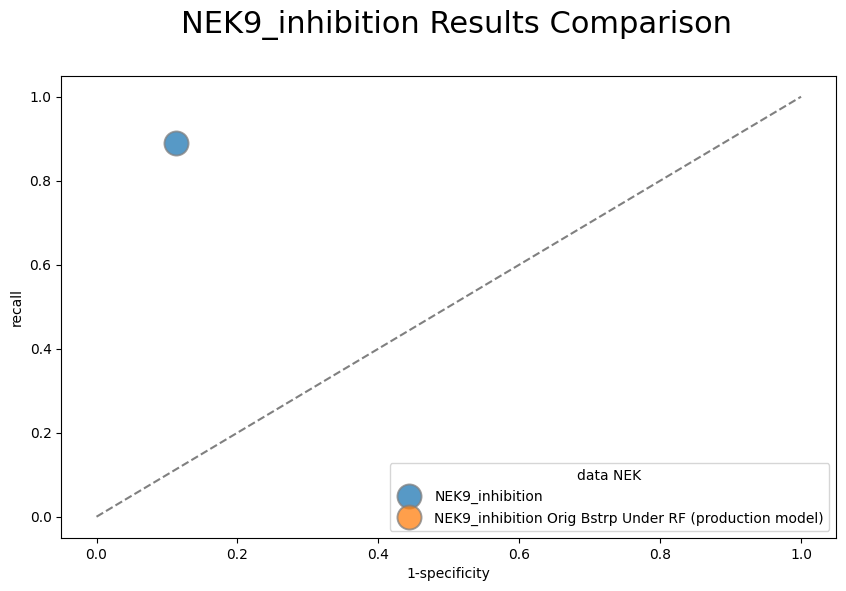

In [175]:

for nek in rf_prod_results['model NEK'].unique():
    print(nek)
    fig, axs = plt.subplots(figsize=(10,6))
    plt.suptitle(f'{nek} Results Comparison',fontsize=22, x=0.52, y=0.99)
    # plotting_df = selected_results[selected_results['model NEK']==nek] 
    
    strategy = rf_prod_results['strategy'].values[0]
    prod_result= rf_prod_results[rf_prod_results['model NEK']==nek] 
    prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'
    
    new_results = selected_results[(selected_results['model strategy']==strategy) 
                & (selected_results['model NEK']==nek)]
    plotting_df = pd.concat([new_results, prod_result], ignore_index=True)

    

    sns.scatterplot(data=plotting_df, x='1-specificity', y='recall', hue='data NEK'
                   ,edgecolor='gray',alpha=0.75,s=300 )
    plt.plot([-0,1], [0, 1], linestyle='--', color='gray')
    plt.savefig(f'comparison_figs/{nek}_{strategy}.png',bbox_inches='tight')

NEK2_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/3209743640.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/3209743640.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/3209743640.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/3209743640.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/3209743640.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

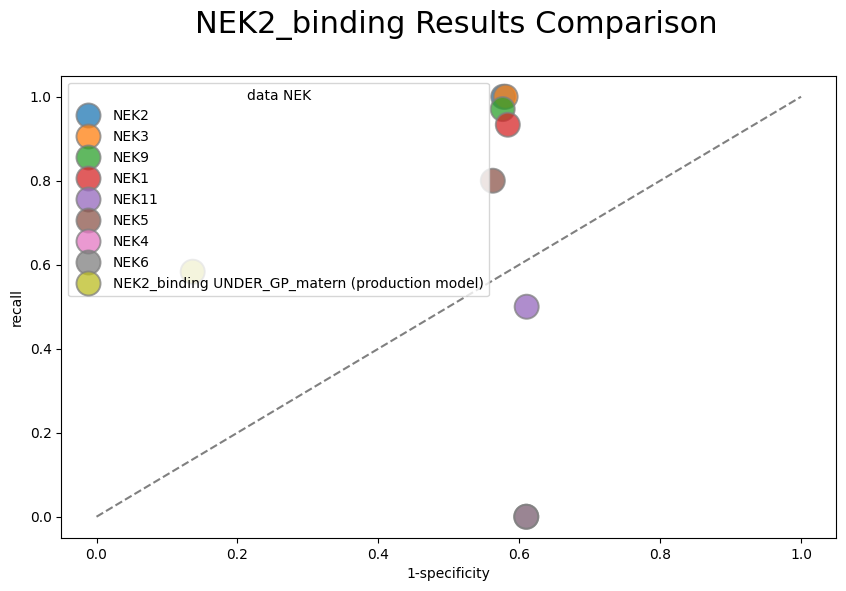

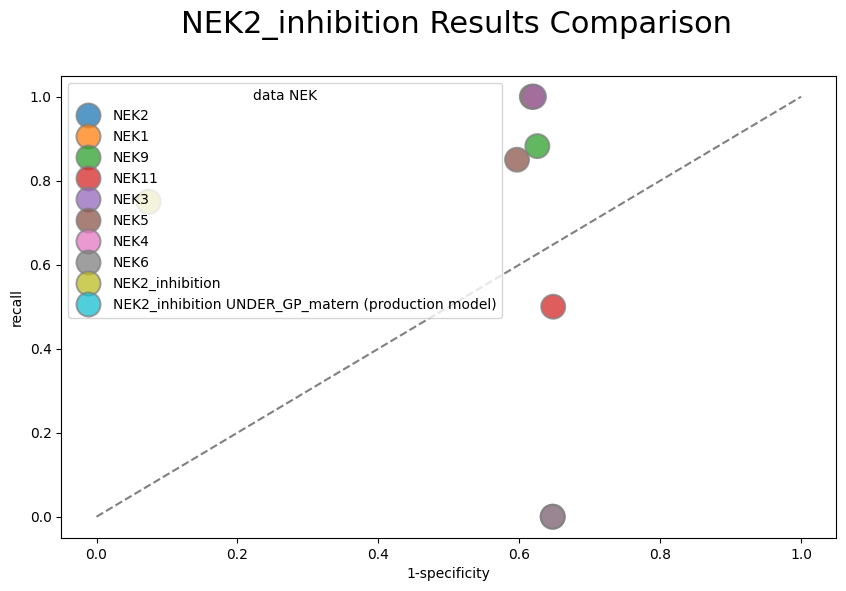

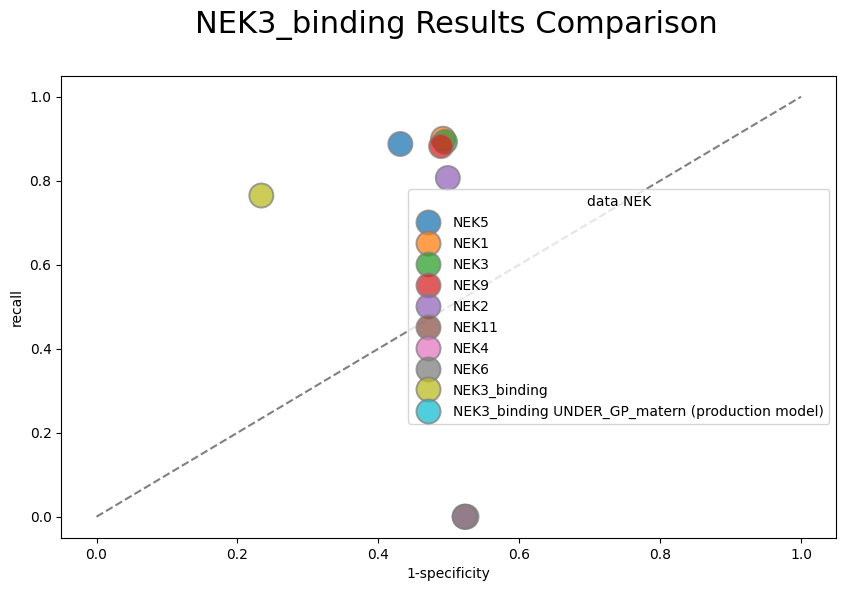

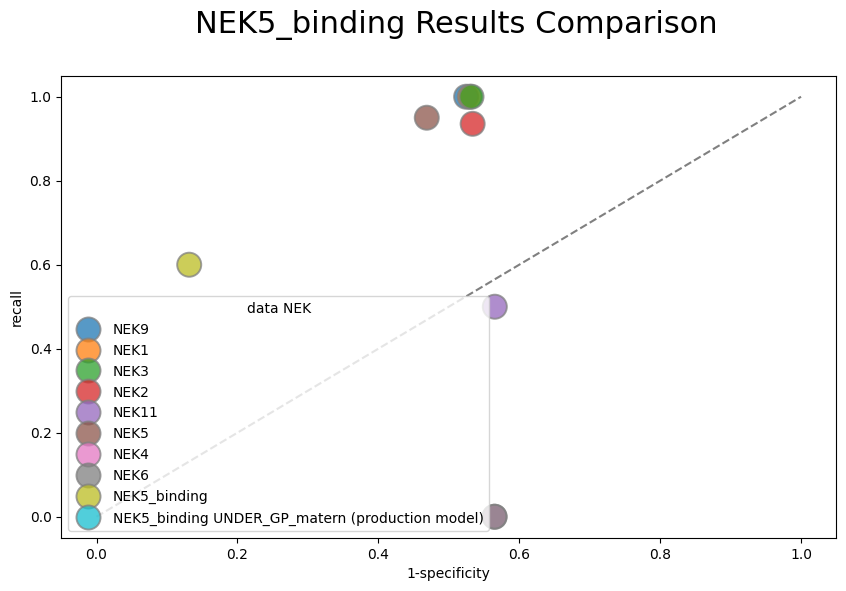

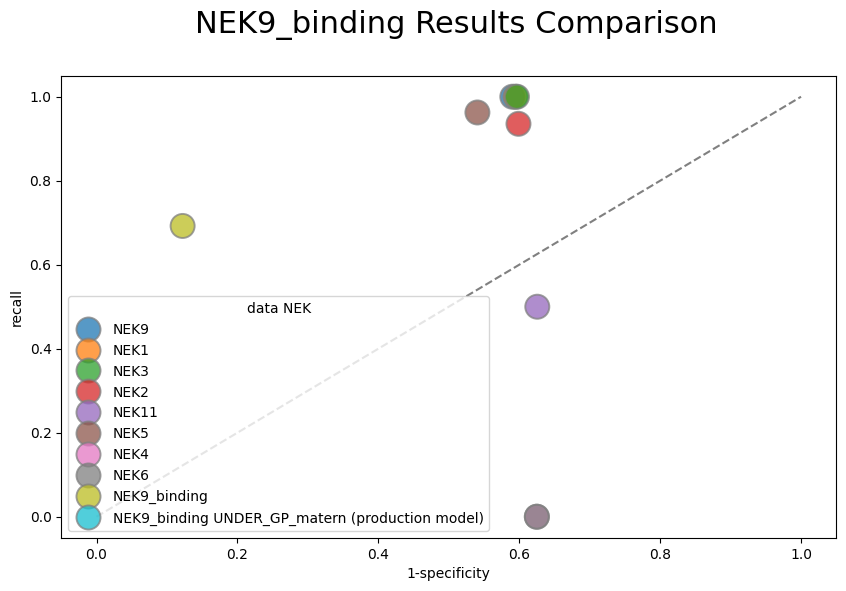

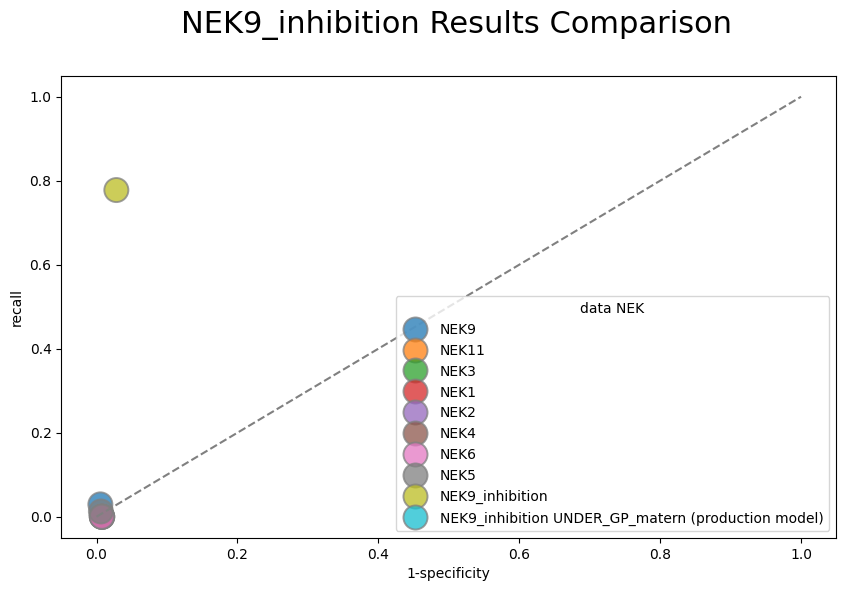

In [176]:

for nek in gp_prod_results['model NEK'].unique():
    print(nek)
    fig, axs = plt.subplots(figsize=(10,6))
    plt.suptitle(f'{nek} Results Comparison',fontsize=22, x=0.52, y=0.99)
    
    strategy = gp_prod_results['strategy'].values[0]
    prod_result= gp_prod_results[gp_prod_results['model NEK']==nek] 
    prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'
    
    new_results = selected_results[(selected_results['model strategy']==strategy) 
                & (selected_results['model NEK']==nek)]
    plotting_df = pd.concat([new_results, prod_result], ignore_index=True)

    

    sns.scatterplot(data=plotting_df, x='1-specificity', y='recall', hue='data NEK'
                   ,edgecolor='gray',alpha=0.75,s=300 )
    plt.plot([-0,1], [0, 1], linestyle='--', color='gray')
    plt.savefig(f'comparison_figs/{nek}_{strategy}.png',bbox_inches='tight')